# Numpy-only 2-layer Neural Network for Binary Classification

### Imports 

In [16]:
# Import libraries
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from neural_net import NeuralNet
import numpy as np

## Using UCI Heart Disease Dataset

In [17]:
# Define header names

headers = ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

# Make DF

heart_df = pd.read_csv('Data/heart.dat', sep = ' ', names = headers)

In [18]:
# Check shape of DF

heart_df.shape

(270, 14)

In [19]:
# Check for na's

heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [20]:
# Check datatypes

heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [21]:
# Define training set

X = heart_df.drop(columns = ['heart_disease'])

# Enumerate target class i.e. labels
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1,0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2,1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

# Make train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [22]:
# Scale values

sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


### Train Model and Use it to Predict

In [23]:
# Instantiate class of Neural Net using default parameters

nn = NeuralNet()

In [24]:
# Fit model

nn.fit(Xtrain, ytrain)

Training epoch 0, calculated loss: 1.406818099455712
Training epoch 1, calculated loss: 1.2283644538724772
Training epoch 2, calculated loss: 1.1027579343396263
Training epoch 3, calculated loss: 1.010277834670556
Training epoch 4, calculated loss: 0.9375456811690593
Training epoch 5, calculated loss: 0.8771342674193834
Training epoch 6, calculated loss: 0.8256029193292977
Training epoch 7, calculated loss: 0.7809976438171825
Training epoch 8, calculated loss: 0.7419983603962279
Training epoch 9, calculated loss: 0.707447080573352
Training epoch 10, calculated loss: 0.6761308099914313
Training epoch 11, calculated loss: 0.6479719529677453
Training epoch 12, calculated loss: 0.6225758410329949
Training epoch 13, calculated loss: 0.5995873203513066
Training epoch 14, calculated loss: 0.5787978131048888
Training epoch 15, calculated loss: 0.5599182115487729
Training epoch 16, calculated loss: 0.5427118970422696
Training epoch 17, calculated loss: 0.5270878681118275
Training epoch 18, calc

Training epoch 273, calculated loss: 0.19311064629426253
Training epoch 274, calculated loss: 0.192726628477748
Training epoch 275, calculated loss: 0.19235661948829577
Training epoch 276, calculated loss: 0.19196502553151357
Training epoch 277, calculated loss: 0.1915986397577637
Training epoch 278, calculated loss: 0.19122341022500783
Training epoch 279, calculated loss: 0.19083085175095132
Training epoch 280, calculated loss: 0.19046145055031888
Training epoch 281, calculated loss: 0.19009102370011108
Training epoch 282, calculated loss: 0.18970648638050977
Training epoch 283, calculated loss: 0.18934881202258527
Training epoch 284, calculated loss: 0.1889738749204568
Training epoch 285, calculated loss: 0.1886218398356439
Training epoch 286, calculated loss: 0.18825106361899036
Training epoch 287, calculated loss: 0.18786522308620968
Training epoch 288, calculated loss: 0.1875090812628159
Training epoch 289, calculated loss: 0.1871345473867985
Training epoch 290, calculated loss: 0

Training epoch 424, calculated loss: 0.1521108764328087
Training epoch 425, calculated loss: 0.15190066513571876
Training epoch 426, calculated loss: 0.15174397750898871
Training epoch 427, calculated loss: 0.15154324967660396
Training epoch 428, calculated loss: 0.1513364468688277
Training epoch 429, calculated loss: 0.1511480397586336
Training epoch 430, calculated loss: 0.15095051070204293
Training epoch 431, calculated loss: 0.1507677867515939
Training epoch 432, calculated loss: 0.1505720638455779
Training epoch 433, calculated loss: 0.1503764324283442
Training epoch 434, calculated loss: 0.15019125186645826
Training epoch 435, calculated loss: 0.14999649628648593
Training epoch 436, calculated loss: 0.14981817237114212
Training epoch 437, calculated loss: 0.14960372682190795
Training epoch 438, calculated loss: 0.14943510557256834
Training epoch 439, calculated loss: 0.14923156198711446
Training epoch 440, calculated loss: 0.1490323110302897
Training epoch 441, calculated loss: 0

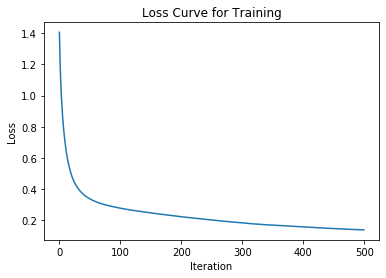

In [25]:
# Plot model loss

nn.plot_loss()

In [26]:
# Use models to predict

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

In [27]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn.accuracy(ytrain, train_pred)))
print("Test accuracy is {}%".format(nn.accuracy(ytest, test_pred)))

Train accuracy is 94%
Test accuracy is 68%


## Using Banknote Authentication Dataset

In [28]:
# Read in dataframe

banknote_df = pd.read_csv('Data/data_banknote_authentication.txt', sep = ',', names = ['variance', 'skewness', 'kurtosis', 'entropy', 'classification'])

In [29]:
# Check shape of DF

banknote_df.shape

(1372, 5)

In [30]:
# Check for na's

banknote_df.isna().sum()

variance          0
skewness          0
kurtosis          0
entropy           0
classification    0
dtype: int64

In [31]:
# Check datatypes

banknote_df.dtypes

variance          float64
skewness          float64
kurtosis          float64
entropy           float64
classification      int64
dtype: object

In [32]:
# Define training set

X2 = banknote_df.drop(columns = ['classification'])

y_label2 = banknote_df['classification'].values.reshape(X2.shape[0], 1)

# Make train-test split
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y_label2, test_size = 0.2, random_state = 2)

In [33]:
Xtrain2.shape

(1097, 4)

In [34]:
# Scale Data

sc.fit(Xtrain2)
Xtrain2 = sc.transform(Xtrain2)
Xtest2 = sc.transform(Xtest2)

print(f"Shape of train set is {Xtrain2.shape}")
print(f"Shape of test set is {Xtest2.shape}")
print(f"Shape of train label is {ytrain2.shape}")
print(f"Shape of test labels is {ytest2.shape}")

Shape of train set is (1097, 4)
Shape of test set is (275, 4)
Shape of train label is (1097, 1)
Shape of test labels is (275, 1)


In [35]:
# Define new neural network model with layers corresponding to input dimensions of 4

nn2 = NeuralNet(layers=[4, 5, 1])

In [36]:
# Fit new model 

nn2.fit(Xtrain2, ytrain2)

Training epoch 0, calculated loss: 1.5543208674243605
Training epoch 1, calculated loss: 1.0206359831199538
Training epoch 2, calculated loss: 1.0457455064409347
Training epoch 3, calculated loss: 0.68995373571536
Training epoch 4, calculated loss: 0.6397701113244398
Training epoch 5, calculated loss: 0.541329566993813
Training epoch 6, calculated loss: 0.4659455632611285
Training epoch 7, calculated loss: 0.3925161037720746
Training epoch 8, calculated loss: 0.3346998923982945
Training epoch 9, calculated loss: 0.29078823986940117
Training epoch 10, calculated loss: 0.2562930989024405
Training epoch 11, calculated loss: 0.2282851319826521
Training epoch 12, calculated loss: 0.20488885261056808
Training epoch 13, calculated loss: 0.1851624968060071
Training epoch 14, calculated loss: 0.16851992047006334
Training epoch 15, calculated loss: 0.15451366892854068
Training epoch 16, calculated loss: 0.14271935539455005
Training epoch 17, calculated loss: 0.1327178585577677
Training epoch 18,

Training epoch 204, calculated loss: 0.023823533863734196
Training epoch 205, calculated loss: 0.023755818941390325
Training epoch 206, calculated loss: 0.02368865603602478
Training epoch 207, calculated loss: 0.023621971869010196
Training epoch 208, calculated loss: 0.02355576090957149
Training epoch 209, calculated loss: 0.023490019750692922
Training epoch 210, calculated loss: 0.02342474204123094
Training epoch 211, calculated loss: 0.023359920265250397
Training epoch 212, calculated loss: 0.02329555815918436
Training epoch 213, calculated loss: 0.023231615511551312
Training epoch 214, calculated loss: 0.023168167189470932
Training epoch 215, calculated loss: 0.023106503740087346
Training epoch 216, calculated loss: 0.023045262943421428
Training epoch 217, calculated loss: 0.022984457449207463
Training epoch 218, calculated loss: 0.022924086456384756
Training epoch 219, calculated loss: 0.02286443977695804
Training epoch 220, calculated loss: 0.02280572172555671
Training epoch 221, 

Training epoch 358, calculated loss: 0.017534618154305317
Training epoch 359, calculated loss: 0.017507773942776382
Training epoch 360, calculated loss: 0.017480852005937925
Training epoch 361, calculated loss: 0.017454183100791016
Training epoch 362, calculated loss: 0.017427496928137515
Training epoch 363, calculated loss: 0.01740082613664551
Training epoch 364, calculated loss: 0.017374472107268273
Training epoch 365, calculated loss: 0.01734795801760313
Training epoch 366, calculated loss: 0.017321616845881228
Training epoch 367, calculated loss: 0.01729542228899278
Training epoch 368, calculated loss: 0.017269151403135292
Training epoch 369, calculated loss: 0.017243126761711802
Training epoch 370, calculated loss: 0.01721709001590805
Training epoch 371, calculated loss: 0.017191059244768204
Training epoch 372, calculated loss: 0.0171653355779045
Training epoch 373, calculated loss: 0.017139453513520645
Training epoch 374, calculated loss: 0.0171137314795393
Training epoch 375, ca

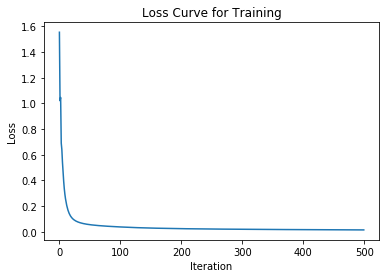

In [37]:
# Plot loss 

nn2.plot_loss()

In [38]:
# Use models to predict

train_pred2 = nn2.predict(Xtrain2)
test_pred2 = nn2.predict(Xtest2)

In [39]:
# Get accuracy of predictions

print("Train accuracy is {}%".format(nn2.accuracy(ytrain2, train_pred2)))
print("Test accuracy is {}%".format(nn2.accuracy(ytest2, test_pred2)))

Train accuracy is 99%
Test accuracy is 97%


## Using Sonar Dataset

In [40]:
# Read in dataframe

sonar_df = pd.read_csv('Data/sonar.all-data', header=None)

In [41]:
# Check shape of DF

sonar_df.shape

(208, 61)

In [42]:
# Check for na's

sonar_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [43]:
# Check datatypes

sonar_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object